# SYDE 556/750: Simulating Neurobiological Systems

## Symbols and Symbol-like representation in neurons

- We've seen how to represent vectors in neurons
    - And how to compute functions on those vectors
    - And dynamical systems
- But how can we do anything like human language?
    - How could we represent the fact that "the number after 8 is 9"
    - Or "dogs chase cats"
    - Or "Anne knows that Bill thinks that Charlie likes Dave"
- Does the NEF help us at all with this?
    - Or is this just too hard a problem yet?

### Traditional Cognitive Science

- Lots of theories that work with structured information like this
- Pretty much all of them use some representation framework like this:
    - `after(eight, nine)`
    - `chase(dogs, cats)`
    - `knows(Anne, thinks(Bill, likes(Charlie, Dave)))`

- Cognitive models manipulate these sorts of representations
    - mental arithmetic
    - driving a car
    - using a GUI
    - parsing language
    - etc etc
- Seems to match well to behavioural data, so something like this should be right
- So how can we do this in neurons?
    

- This is a hard problem
- Jackendoff (2002) posed this as a major problem
- Four linguistic challenges for cognitive neuroscience
    - The Binding Problem
    - The Problem of 2
    - The Problem of Variables
    - Working Memory vs Long-term memory

- The Binding Problem
    - Suppose you see a red square and a blue circle
    - How do you keep these ideas separate?  How does "red" get bound with "square", and how is it kept separate from "blue" and "circle"?
- The Problem of 2
    - "The little star's beside the big star"
    - How do we keep those two uses of "star" separate?
- The Problem of Variables
    - Words seem to have types (nouns, verbs, adjectives, etc, etc)
    - How do you make use of that?  
    - E.g. "blue *NOUN*" is fine, but "blue *VERB*" is not (or is very different)
- Working memory vs Long-term memory
    - We can both use sentences (working memory) and store them indefinitely (long-term memory)
    - How do these transfer back and forth?
    - What are they in the brain?  This seems to require moving from storing something in neural activity to storing it in connection weights
    

### Possible solutions

- Oscilations
    - "red square and blue circle"
    - Different patterns of activity for RED, SQUARE, BLUE, and CIRCLE
    - Have the patterns for RED and SQUARE happen, then BLUE and CIRCLE, then back to RED and SQUARE
    - More complex structures possible too:
    - E.g. the LISA architecture
    
<img src="files/lecture_symbols/lisa.png">

- Problems
    - What controls this oscillation?
    - How is it parsed? (i.e., mapped to sets of oscillators)
    - How do we deal with the exponentional explosion of nodes needed?
    
- Implementing Symbol Systems in Neurons
    - Build a general-purpose symbol-binding system
    - Lots of temporary pools of neurons
    - Ways to temporarily associate them with particular concepts
    - Ways to temporarily associate pools together
    - Neural Blackboard Architecture
    
<img src="files/lecture_symbols/nba.png">

- Problems
    - Very particular structure (doesn't seem to match biology)
    - Uses a very large number of neurons (~500 million) to be flexible enough for simple sentences
    - And that's just to represent the sentence, never mind controlling and manipulating it
    
- Vector operators
    - Paul Smolensky [1990](http://verbs.colorado.edu/~llbecker/papers/Smolensky-TensorProductVariableBinding.pdf) suggests using a mathematical operator called a 'tensor product' to bind vectors together.
    - The idea is that this operator can 'bind' and its inverse 'unbind' these vectors together.
    - It provides an algebraic way of specifying symbolic structures in a vector space.
    - If you can represent vector spaces and operators in neurons (e.g. NEF), then it provides a way of working with symbolic structures in neurons.
    - Every time you bind vectors, the result has D^2 as many dimensions.
    - It scales extremely poorly: the dimensionality of a structure representation is the base space to the power of depth, i.e. $D_S = D^{depth+1}$

    
<img src="files/lecture_symbols/tensor.png">

- Deeper problem
    - If we're just implementing something like the original symbol system in neurons, then we're reducing the neural aspects to *mere implementational details*
    - That is, if we had a perfectly good way to implement symbol structures in neurons, then we could take existing cognitive theories based on symbol structures and implement them in neurons
    - But so what?  That'd just be conceeding the point that the neurons don't matter -- you don't need them to develop the theory.  
        - They're useful for testing some aspects, like what firing patterns should be
        - But it's more for completeness sake than for understanding
        - No more interesting than the question of "well, how does that neuron get implemented in terms of chemistry"  or atoms.  Or quarks.
    - This is why the majority of cognitive scientists don't worry about neurons

### Semantic pointers

- Tensor products are on the right track, if we can solve the scaling problem.
- In 'How to build a brain' we exploit a compression operator introduced by Tony Plate called 'circular convolution' $\circledast$
- In the book, I suggest that neurally realized compressed vector representations are prevalent in the brain, and call such representations 'semantic pointers'
- Pointers: because they can be used like computer science pointers to be efficient references to complex representations
- Semantic: because (unlike CS pointers), their content is derived (through compression) from semantically related representations
- This provides something that's similar to the symbolic approach, but much more tied to biology
    - Most of the same capabilities as the classic symbol systems
    - But not all
- Based on vectors and functions on those vectors
    - There is a vector for each concept
    - Build up structures by doing math on those vectors
    
- Example
    - blue square and red circle
    - can't just do BLUE+SQUARE+RED+CIRCLE
        - why?
    - need some other operation as well
    - requirements
        - input 2 vectors, get a new vector as output
        - reversible (given the output and one of the input vectors, generate the other input vector)
        - output vector is highly dissimilar to either input vector
            - unlike addition, where the output is highly similar
    - Circular convoluation can act as such a function?
    - (There are many other such functions: XOR, Multiply, etc... collectively this kind of vector space binding to represent structures are sometimes called 'Vector Symbolic Architectures' (Gayler, 2003))
<img src="lecture_symbols/operators_compare.png">


- Why circular convolution?
    - Extensively studied (Plate, 1997: Holographic Reduced Representations)
    - Easy to approximately invert (circular correlation)
    
- Examples:
- `BLUE` $\circledast$ `SQUARE + RED` $\circledast$ `CIRCLE`
- `DOG` $\circledast$ `AGENT + CAT` $\circledast$ `THEME + VERB` $\circledast$ `CHASE`

<img src="files/lecture_symbols/bind.png">

- unbinding:

<img src="files/lecture_symbols/unbind.png">

- compressed outer product

<img src="files/lecture_symbols/circonv.png">

- Lots of nice properties
    - Can store complex structures
         - `after(eight, nine)`
         - `NUMBER` $\circledast$ `EIGHT + NEXT` $\circledast$ `NINE`
         - `knows(Anne, thinks(Bill, likes(Charlie, Dave)))`
         - `SUBJ` $\circledast$ `ANNE + ACT` $\circledast$ `KNOWS + OBJ` $\circledast$ `(SUBJ` $\circledast$ `BILL + ACT` $\circledast$ `THINKS + OBJ` $\circledast$ `(SUBJ` $\circledast$ `CHARLIE + ACT` $\circledast$ `LIKES + OBJ` $\circledast$ `DAVE))`
    - But gracefully degrades!
        - as representation gets more complex, the accuracy of breaking it apart decreases
    - Keeps similarity information
        - if `RED` is similar to `PINK` then `RED` $\circledast$ `CIRCLE` is similar to `PINK` $\circledast$ `CIRCLE`
        
- But rather complicated
    - Seems like a weird operation for neurons to do

### Circular convolution in the NEF

- Or is it?
- Circular convolution is a whole bunch ($D^2$) of multiplies
- Like any convolution, it can also be written as a fourier transform, an elementwise multiply, and another fourier transform
- The discrete fourier transform is just a linear operation, hence a matrix
- So that's just $D$ pairwise multiplies
- In fact, circular convolution turns out to be *exactly* what the NEF shows neurons are good at

### Jackendoff's Challenges

- As pointed out in [Vector Symbolic Architectures Answer Jackendoff's Challenges for Cognitive Neuroscience](http://arxiv.org/ftp/cs/papers/0412/0412059.pdf)
- The Binding Problem
    - There is a lot of "binding" (structurally combining items) in linguistics (more than vision) 
    - `RED` $\circledast$ `CIRCLE + BLUE` $\circledast$ `TRIANGLE`
    - After it is bound, we can ask "what color is the circle by doing $\circledast$ `CIRCLE'`
        - where `'` is "inverse"
        - (`RED` $\circledast$ `CIRCLE + BLUE` $\circledast$ `TRIANGLE`) $\circledast$ `CIRCLE'`
        - `RED` $\circledast$ `CIRCLE` $\circledast$ `CIRCLE' + BLUE` $\circledast$ `TRIANGLE` $\circledast$ `CIRCLE'`
        - `RED + BLUE` $\circledast$ `TRIANGLE` $\circledast$ `CIRCLE'`
        - `RED + noise`
        - `RED`
- The Problem of 2
    - How can we distinguish two uses of the same concept in a sentence?
    - "The little star's beside the big star"
    - `OBJ1` $\circledast$ `(TYPE` $\circledast$ `STAR + SIZE` $\circledast$ `LITTLE) + OBJ2` $\circledast$ `(TYPE` $\circledast$ `STAR + SIZE` $\circledast$ `BIG) + BESIDE` $\circledast$ `OBJ1` $\circledast$ `OBJ2`
        - notice that `BESIDE` $\circledast$ `OBJ1` $\circledast$ `OBJ2` = `BESIDE` $\circledast$ `OBJ2` $\circledast$ `OBJ1`
        - and that we can distinguish the two uses of star
- The Problem of Variables
    - How can we manipulate abstract place holders?
    - `S` = `RED` $\circledast$ `NOUN`
    - `VAR` = `BALL` $\circledast$ `NOUN'`
    - `S` $\circledast$ `VAR` = `RED` $\circledast$ `BALL`
- Binding in Working Memory vs Long-term memory
    - How can we use and manipulate the same structures in both WM and LTM?
    - vectors are what we work with (activity of neurons)
    - functions are long-term memory (connection weights)
    - functions return (and modify) vectors

### Symbol-like manipulation

- Can do a lot of standard symbol stuff
- Have to explicitly bind and unbind to manipulate the data
- Less accuracy for more complex structures
- But we can also do more with these representations

### Raven's Progressive Matrices

- An IQ test that's generally considered to be the best at measuring general-purpose "fluid" intelligence
    - nonverbal (so it's not measuring language skills, and fairly unbiased across cultures, hopefully)
    - fill in the blank
    - given eight possible answers; pick one
    
<img src="files/lecture_symbols/ravens.png" width=300>

- This is not an actual question on the test
    - The test is copyrighted
    - They don't want the test to leak out, since it's been the same set of 60 questions since 1936
    - But they do look like that

- How can we model people doing this task?
- A fair number of different attempts
    - None neural
    - Generally use the approach of building in a large set of different types of patterns to look for, and then trying them all in turn
    - Which seems wrong for a test that's supposed to be about flexible, fluid intelligence
    
- Does this vector approach offer an alternative?

- First we need to represent the different patterns as a vector
    - This is a hard image interpretation problem
    - Still ongoing work here
    - So we'll skip it and start with things in vector form
    
<img src="files/lecture_symbols/ravens2.png">    
    
- How do we represent a picture?
    - `SHAPE` $\circledast$ `ARROW + NUMBER` $\circledast$ `ONE + DIRECTION` $\circledast$ `UP`
    - can do variations like this for all the pictures
    - fairly standard with most assumptions about how people represent complex scenes
    - but that part is not being modelled (yet!)
    
- We have shown that it's possible to build these sorts of representations up directly from visual stimuli
    - With a very simple vision system that can only recognize a few different shapes
    - And where items have to be shown sequentially as it has no way of moving its eyes
   

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('U_Q6Xjz9QHg', width=720, height=400, loop=1, autoplay=0, playlist='U_Q6Xjz9QHg')

- The memory of the list is built up by using a basal ganglia action selection system to control feeding values into an integrator
    - The thought bubble shows how close the decoded values are to the ideal
    - Notice the forgetting!  
    
- The same system can be used to do a version of the Raven's Matrices task


In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('Q_LRvnwnYp8', width=720, height=400, loop=1, autoplay=0, playlist='Q_LRvnwnYp8')

- `S1 = ONE` $\circledast$ `P1`
- `S2 = ONE` $\circledast$ `P1 + ONE` $\circledast$ `P2`
- `S3 = ONE` $\circledast$ `P1 + ONE` $\circledast$ `P2 + ONE` $\circledast$ `P3`
- `S4 = FOUR` $\circledast$ `P1`
- `S5 = FOUR` $\circledast$ `P1 + FOUR` $\circledast$ `P2`
- `S6 = FOUR` $\circledast$ `P1 + FOUR` $\circledast$ `P2 + FOUR` $\circledast$ `P3`
- `S7 = FIVE` $\circledast$ `P1`
- `S8 = FIVE` $\circledast$ `P1 + FIVE` $\circledast$ `P2`

- what is `S9`?

- Let's figure out what the transformation is
- `T1 = S2` $\circledast$ `S1'`
- `T2 = S3` $\circledast$ `S2'`
- `T3 = S5` $\circledast$ `S4'`
- `T4 = S6` $\circledast$ `S5'`
- `T5 = S8` $\circledast$ `S7'`

- `T = (T1 + T2 + T3 + T4 + T5)/5`
- `S9 = S8` $\circledast$ `T`

- `S9 = FIVE` $\circledast$ `P1 + FIVE` $\circledast$ `P2 + FIVE` $\circledast$ `P3`

- This becomes a novel way of manipulating structured information
    - Exploiting the fact that it is a vector underneath
    - [A spiking neural model applied to the study of human performance and cognitive decline on Raven's Advanced Progressive Matrices](http://www.sciencedirect.com/science/article/pii/S0160289613001542)

###Using Nengo
- How can we use Nengo to perform these kinds of operations?
- There's a 'SPA' module you can import, and it lets you do all kinds of this stuff
- Let's try answering simple questions about the bindings in a representation
- I just stole this from the 'Question answering' example in Nengo

In [1]:
%pylab inline

import nengo
from nengo import spa

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Number of dimensions for the Semantic Pointers
dimensions = 32

model = spa.SPA(label="Simple question answering")

with model:
    model.color_in = spa.Buffer(dimensions=dimensions)
    model.shape_in = spa.Buffer(dimensions=dimensions)
    model.conv = spa.Buffer(dimensions=dimensions)
    model.cue = spa.Buffer(dimensions=dimensions)
    model.out = spa.Buffer(dimensions=dimensions)
    
    # Connect the buffers
    cortical_actions = spa.Actions(
        'conv = color_in * shape_in',
        'out = conv * ~cue'
    )
    model.cortical = spa.Cortical(cortical_actions)  

The input will switch every 0.5 seconds between `RED` and `BLUE`. In the same way the shape input switches between `CIRCLE` and `SQUARE`. Thus, the network will bind alternatingly `RED * CIRCLE` and `BLUE * SQUARE` for 0.5 seconds each.

The cue for deconvolving bound semantic pointers cycles through `CIRCLE`, `RED`, `SQUARE`, and `BLUE` within one second. 


In [4]:
def color_input(t):
    if (t // 0.5) % 2 == 0:
        return 'RED'
    else:
        return 'BLUE'

def shape_input(t):
    if (t // 0.5) % 2 == 0:
        return 'CIRCLE'
    else:
        return 'SQUARE'

def cue_input(t):
    sequence = ['0', 'CIRCLE', 'RED', '0', 'SQUARE', 'BLUE']
    idx = int((t // (1. / len(sequence))) % len(sequence))
    return sequence[idx]

with model:
    model.inp = spa.Input(color_in=color_input, shape_in=shape_input, cue=cue_input)

In [5]:
with model:
    model.config[nengo.Probe].synapse = nengo.Lowpass(0.03)
    color_in = nengo.Probe(model.color_in.state.output)
    shape_in = nengo.Probe(model.shape_in.state.output)
    cue = nengo.Probe(model.cue.state.output)
    conv = nengo.Probe(model.conv.state.output)
    out = nengo.Probe(model.out.state.output)
    
sim = nengo.Simulator(model)
sim.run(3.)

Simulation finished in 0:01:19.                                                 


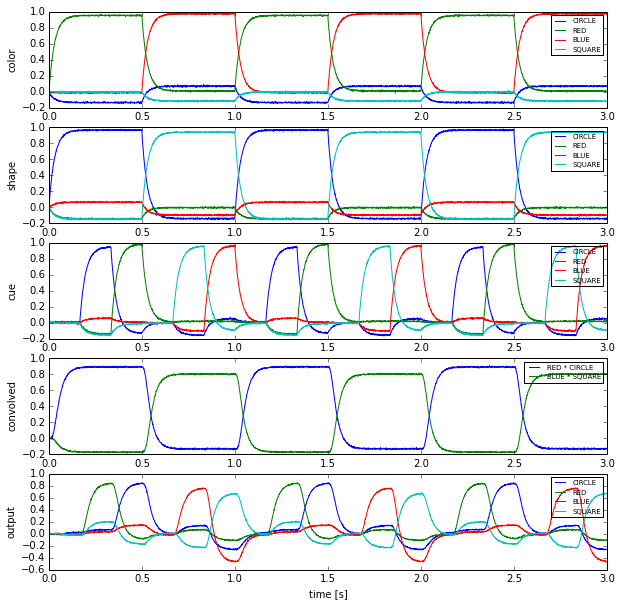

In [6]:
plt.figure(figsize=(10, 10))
vocab = model.get_default_vocab(dimensions)

plt.subplot(5, 1, 1)
plt.plot(sim.trange(), model.similarity(sim.data, color_in))
plt.legend(model.get_output_vocab('color_in').keys, fontsize='x-small')
plt.ylabel("color")

plt.subplot(5, 1, 2)
plt.plot(sim.trange(), model.similarity(sim.data, shape_in))
plt.legend(model.get_output_vocab('shape_in').keys, fontsize='x-small')
plt.ylabel("shape")

plt.subplot(5, 1, 3)
plt.plot(sim.trange(), model.similarity(sim.data, cue))
plt.legend(model.get_output_vocab('cue').keys, fontsize='x-small')
plt.ylabel("cue")

plt.subplot(5, 1, 4)
for pointer in ['RED * CIRCLE', 'BLUE * SQUARE']:
    plt.plot(sim.trange(), vocab.parse(pointer).dot(sim.data[conv].T), label=pointer)
plt.legend(fontsize='x-small')
plt.ylabel("convolved")

plt.subplot(5, 1, 5)
plt.plot(sim.trange(), spa.similarity(sim.data[out], vocab))
plt.legend(model.get_output_vocab('out').keys, fontsize='x-small')
plt.ylabel("output")
plt.xlabel("time [s]");

In [7]:
sum(ens.n_neurons for ens in model.all_ensembles) #Total number of neurons

35200